In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
df =  pd.read_csv("Quickr_Properties_Complete.csv")

In [3]:
df.head()

,Unnamed: 0,Title,Location,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Date of Listing,Price
0,0,3 BHK 2036 Sq. ft Apartment for Sale in Hennur...,"Hennur, Bangalore",3 Bedrooms,3 Bathrooms,2036 Sq.ft Built Up(189.35 Sq.m),"Jan 25, 2025 Available From",₹2.45 Crores
1,1,2 BHK 1094 Sq. ft Apartment for Sale in Padman...,"Padmanabha Nagar, Bangalore",2 Bedrooms,2 Bathrooms,1094 Sq.ft Built Up(101.74 Sq.m),"Jan 1, 2025 Available From",₹1.75 Crores
2,2,2 BHK 1070 Sq. ft Apartment for Sale in Electr...,"Electronic City, Bangalore",2 Bedrooms,2 Bathrooms,1070 Sq.ft Built Up(99.51 Sq.m),"Jan 29, 2025 Available From",₹75 Lakhs
3,3,2 BHK 950 Sq. ft Apartment for Sale in Electro...,"Electronic City Phase I, Bangalore",2 Bedrooms,2 Bathrooms,950 Sq.ft Built Up(88.35 Sq.m),"Jan 26, 2025 Available From",₹90 Lakhs
4,4,2 BHK 1070 Sq. ft Apartment for Sale in Electr...,"Electronic City Phase I, Bangalore",2 Bedrooms,2 Bathrooms,1070 Sq.ft Built Up(99.51 Sq.m),"Jan 26, 2025 Available From",₹75 Lakhs


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22891 entries, 0 to 22890
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           22891 non-null  int64 
 1   Title                22891 non-null  object
 2   Location             22891 non-null  object
 3   No. of Bedrooms      22891 non-null  object
 4   No. of Bathrooms     22891 non-null  object
 5   Total Area (Sq.Ft.)  22891 non-null  object
 6   Date of Listing      22891 non-null  object
 7   Price                22891 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Unnamed: 0             0
Title                  0
Location               0
No. of Bedrooms        0
No. of Bathrooms       0
Total Area (Sq.Ft.)    0
Date of Listing        0
Price                  0
dtype: int64

In [6]:
import pandas as pd
import numpy as np


df = pd.read_csv('Quickr_Properties_Complete.csv')

def convert_price(price):
    try:
        price =  price.replace('₹', '').replace(',',  '').strip()
        if 'Crores' in  price:
            return float(price.split()[0])* 100
        elif 'Lakhs' in price:
            return float(price.split()[0])
    except:
        return np.nan

# Convert No. of Bedrooms and No. of Bathrooms to numeric values
df["No. of Bedrooms"] = df["No. of Bedrooms"].str.extract(r"(\d+)").astype(int)
df["No. of Bathrooms"] = df["No. of Bathrooms"].str.extract(r"(\d+)").astype(int)

# Extract numeric total area (only Sq.ft values)
df["Total Area (Sq.Ft.)"] = df["Total Area (Sq.Ft.)"].str.extract(r"(\d+)").astype(float)

# Convert price to numeric format
df["Price (Lakhs)"] = df["Price"].apply(convert_price)              #.astype(str).apply(convert_price)

# Drop rows with missing values
df = df.dropna()


# Apply frequency encoding to Location to reduce dimensionality
df["Location_Encoded"] = df["Location"].map(df["Location"].value_counts())

# Drop the original Location  
df = df.drop(columns=["Location"])

# Drop unwanted columns
#df= df.drop(columns=["Unnamed: 0",])
df = df.drop(columns=["Unnamed: 0", "Title", "Date of Listing","Price"])



#df.tail()
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 22700 entries, 0 to 22890
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No. of Bedrooms      22700 non-null  int32  
 1   No. of Bathrooms     22700 non-null  int32  
 2   Total Area (Sq.Ft.)  22700 non-null  float64
 3   Price (Lakhs)        22700 non-null  float64
 4   Location_Encoded     22700 non-null  int64  
dtypes: float64(2), int32(2), int64(1)
memory usage: 886.7 KB


In [7]:
df.head()

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,3,3,2036.0,245.0,193
1,2,2,1094.0,175.0,13
2,2,2,1070.0,75.0,225
3,2,2,950.0,90.0,332
4,2,2,1070.0,75.0,332


In [8]:
df.isnull().sum()

No. of Bedrooms        0
No. of Bathrooms       0
Total Area (Sq.Ft.)    0
Price (Lakhs)          0
Location_Encoded       0
dtype: int64

In [9]:
df.head()

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,3,3,2036.0,245.0,193
1,2,2,1094.0,175.0,13
2,2,2,1070.0,75.0,225
3,2,2,950.0,90.0,332
4,2,2,1070.0,75.0,332


In [10]:
df.describe()

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
count,22700.000000,22700.000000,22700.000000,22700.000000,22700.000000
mean,2.786564,2.530352,1793.592863,193.475274,973.508811
std,0.740444,0.934671,997.938746,232.375831,1227.557302
min,1.000000,1.000000,306.000000,10.500000,1.000000
25%,2.000000,2.000000,1200.000000,88.000000,82.000000
50%,3.000000,3.000000,1523.000000,135.000000,287.000000
75%,3.000000,3.000000,1980.000000,220.000000,2274.000000
max,4.000000,6.000000,14000.000000,13500.000000,3435.000000


In [11]:
df.to_csv('Cleared_Quickr.csv')

In [12]:
# Define independent (X) and dependent (y) variables
#X = df.drop(columns=["Price (Lakhs)", 'Location_Encoded'])
X = df.drop(columns=["Price (Lakhs)"])
y = df["Price (Lakhs)"]

#X = df["No. of Bedrooms", "No. of Bathrooms", "Total Area (Sq.Ft.)"]


In [13]:
X

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Location_Encoded
0,3,3,2036.0,193
1,2,2,1094.0,13
2,2,2,1070.0,225
3,2,2,950.0,332
4,2,2,1070.0,332
...,...,...,...,...
22886,3,3,1746.0,1198
22887,1,1,615.0,298
22888,3,3,1287.0,2274
22889,3,3,1600.0,3435


In [14]:
y

0        245.00
1        175.00
2         75.00
3         90.00
4         75.00
          ...  
22886    200.00
22887     46.41
22888    119.00
22889    214.00
22890     84.08
Name: Price (Lakhs), Length: 22700, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# score for test data  set
model.score(X_test,y_test)

0.31267416027029904

In [18]:
# score for training data set
model.score(X_train,y_train)

0.5059159914258293

In [19]:
# Predict on test set
y_pred = model.predict(X_test)


In [20]:
print(y_pred)

[196.54878425  35.89196077 416.42757274 ... 188.0477349  214.16070558
 130.83848738]


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#r2,model.coef_,model.intercept_,mae, rmse


print("Mean absolute error =",mae)
print("Mean squared error =", rmse)
print("r2_score =",  r2)
print("Model coefficint =", model.coef_)
print("Model intercept = ", model.intercept_)


Mean absolute error = 55.71354649710193
Mean squared error = 236.20946965173184
r2_score = 0.31267416027029904
Model coefficint = [-5.47719935 -4.358439    0.15833806  0.00850269]
Model intercept =  -73.06109671186726


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features (PCA is affected by scale)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply PCA (keeping 95% variance)
pca = PCA(n_components =0.95)
X_pca = pca.fit_transform(X_scaled)

# Checking no. of principal components
print(f'Number of Principle components: {X_pca.shape[1]}')


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Linear Regression model

model_pca = LinearRegression()
model_pca.fit(X_train,  y_train)

# predict on test set
y_pred_pca = model_pca.predict(X_test)


# Evaluate Model
mae_pca = mean_absolute_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)


print("Mean Absolute Error:", mae_pca)
print("Root Mean Squared Error:", rmse_pca)
print("R2 Score:",r2_pca)


Number of Principle components: 4
Mean Absolute Error: 55.71354649710152
Root Mean Squared Error: 236.20946965173187
R2 Score: 0.3126741602702988


In [23]:
print(X_scaled)

[[ 0.28826048  0.50248454  0.24291318 -0.63583672]
 [-1.06230979 -0.56743376 -0.70105332 -0.78247261]
 [-1.06230979 -0.56743376 -0.72510342 -0.60976811]
 ...
 [ 0.28826048  0.50248454 -0.50765042  1.05943717]
 [ 0.28826048  0.50248454 -0.193997    2.0052387 ]
 [-1.06230979 -0.56743376 -0.65094894 -0.78736047]]


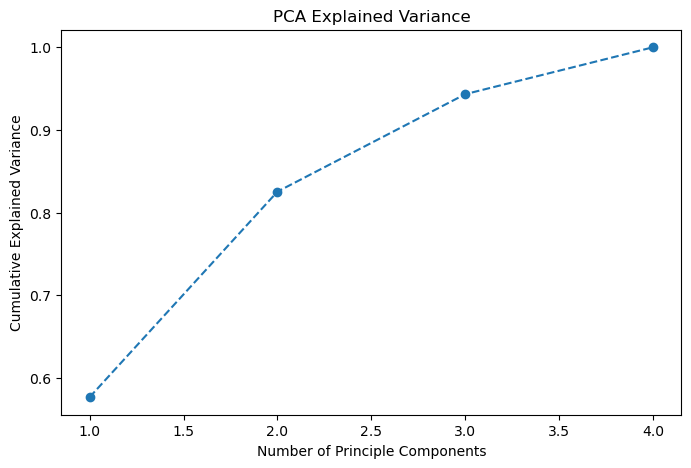

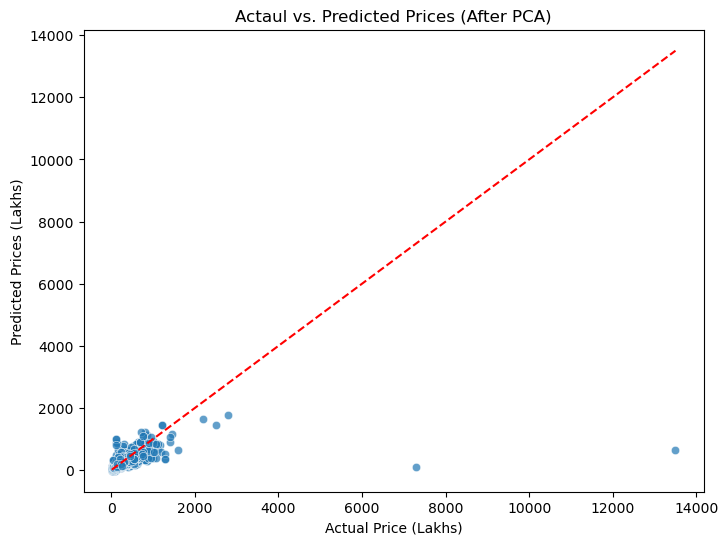

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Explained Variance Plot (PCA)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principle Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


# Plot Actual vs. Predicted Prices

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y = y_pred_pca, alpha=0.7)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actaul vs. Predicted Prices (After PCA)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()



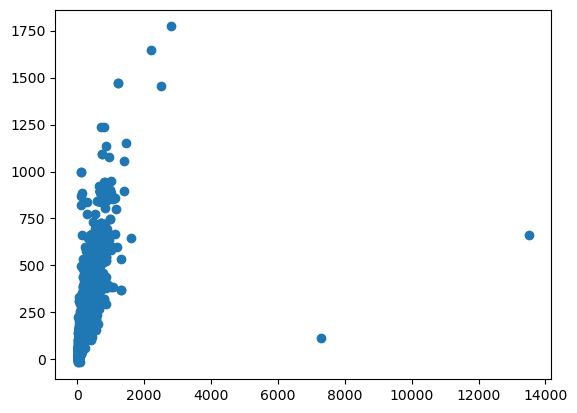

In [25]:
import matplotlib.pyplot as plt

#without applying any thing
plt.scatter(y_test, y_pred)


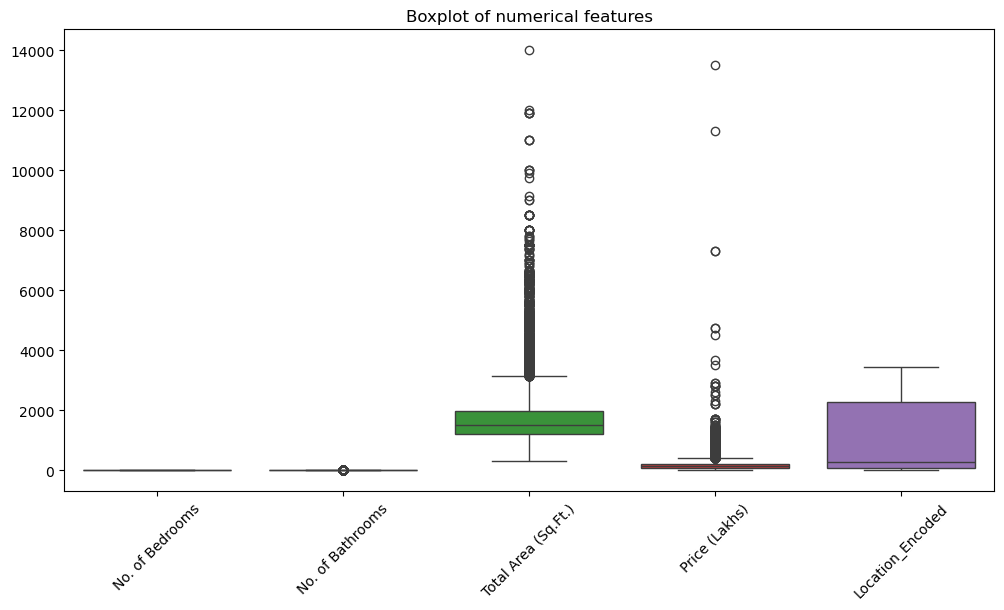

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["No. of Bedrooms", 'No. of Bathrooms', 'Total Area (Sq.Ft.)', 'Price (Lakhs)', 'Location_Encoded']])
plt.xticks(rotation=45)
plt.title("Boxplot of numerical features")
plt.show()


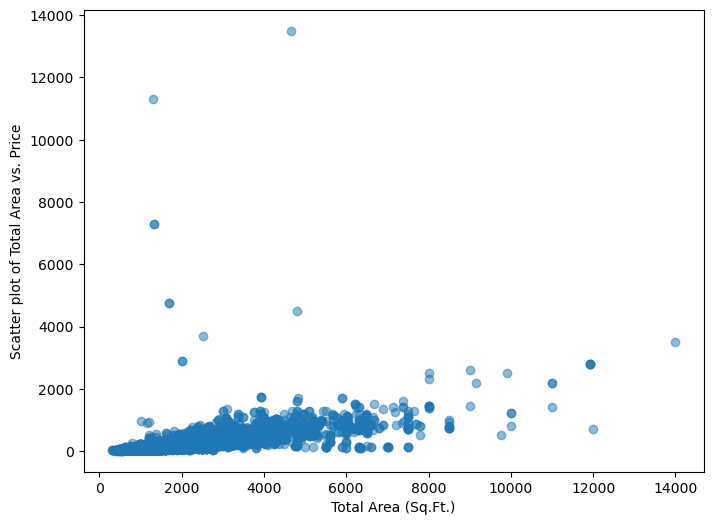

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Total Area (Sq.Ft.)"], df["Price (Lakhs)"], alpha=0.5)
plt.xlabel("Total Area (Sq.Ft.)")
plt.ylabel("Scatter plot of Total Area vs. Price")
plt.show()

In [28]:

#Removing the outliers

Q1 = df[["No. of Bedrooms", "No. of Bathrooms", "Total Area (Sq.Ft.)", "Price (Lakhs)", 'Location_Encoded']].quantile(0.25)
Q3 = df[["No. of Bedrooms", "No. of Bathrooms", "Total Area (Sq.Ft.)", "Price (Lakhs)", 'Location_Encoded']].quantile(0.75)
IQR = Q3 - Q1

# Define acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 *IQR

# Filter the dataset
#df_cleaned = df[~((df < lower_bound ) | (df > upper_bound)).any(axis=1)]

df_cleaned = df[~((df < lower_bound.loc[df.columns]) | (df > upper_bound.loc[df.columns])).any(axis=1)]


print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")


Original dataset size: 22700
Cleaned dataset size: 19952


In [29]:
print(df.columns)

Index(['No. of Bedrooms', 'No. of Bathrooms', 'Total Area (Sq.Ft.)',
       'Price (Lakhs)', 'Location_Encoded'],
      dtype='object')


In [30]:
#Log Transformation


df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)].copy()
df_cleaned["Total Area (Sq.Ft.)"] = np.log1p(df_cleaned["Total Area (Sq.Ft.)"])
df_cleaned["Price (Lakhs)"] = np.log1p(df_cleaned["Price (Lakhs)"])

In [31]:
#Z-score standardization


from scipy import stats
df_cleaned = df_cleaned[(np.abs(stats.zscore(df_cleaned)) < 3).all(axis=1)]

In [32]:
df_cleaned.head()

,No. of Bedrooms,No. of Bathrooms,Total Area (Sq.Ft.),Price (Lakhs),Location_Encoded
0,3,3,7.619233,5.505332,193
1,2,2,6.998510,5.170484,13
2,2,2,6.976348,4.330733,225
3,2,2,6.857514,4.510860,332
4,2,2,6.976348,4.330733,332


In [33]:
# Retrain model with cleaned data

X = df_cleaned.drop(columns=["Price (Lakhs)", 'Location_Encoded'])
y = df_cleaned["Price (Lakhs)"]

X_train, X_test,  y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("After Cleaning Data:")
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R2 Score:",r2)



After Cleaning Data:
Mean Absolute Error: 0.2700269493276237
Root Mean Squared Error: 0.34707592146109556
R2 Score: 0.5700429602936993


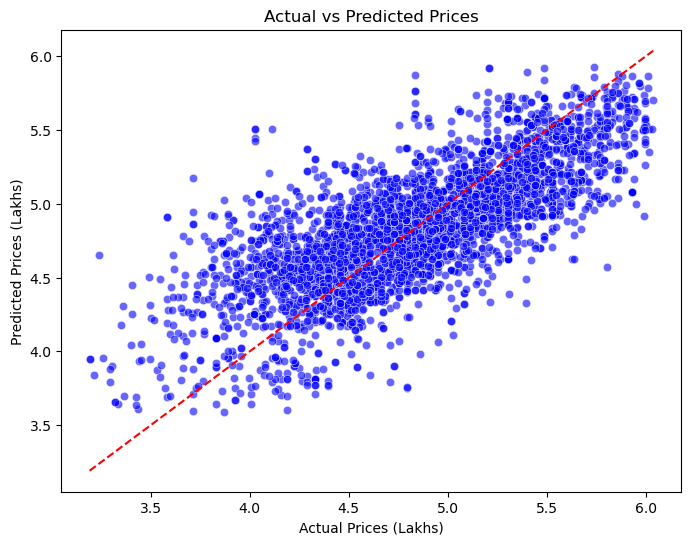

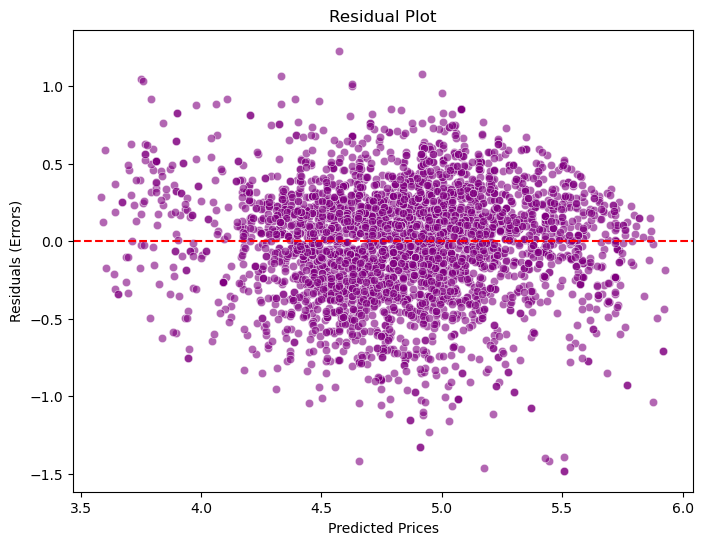

C:\Users\USER\AppData\Local\Temp\ipykernel_6884\1037844636.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients["Coefficient"], y=coefficients.index, palette="viridis")


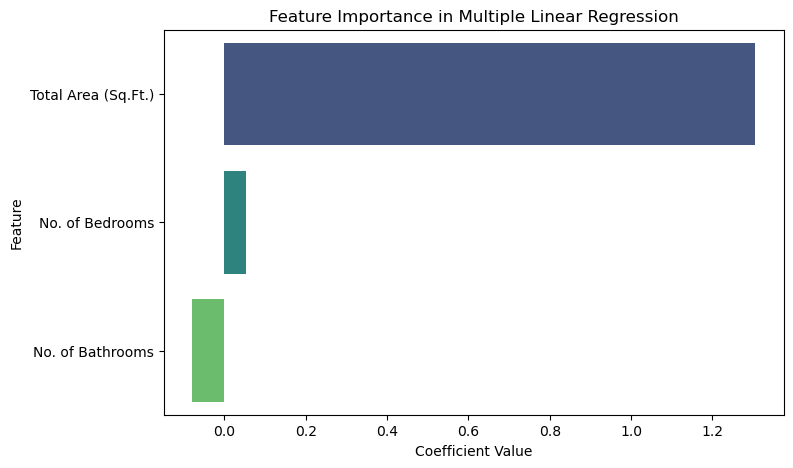

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Scatter Plot - Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # 45-degree line
plt.xlabel("Actual Prices (Lakhs)")
plt.ylabel("Predicted Prices (Lakhs)")
plt.title("Actual vs Predicted Prices")
plt.show()

# 2. Residual Plot - Model Errors
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

# 3. Feature Importance - Coefficients Plot
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients["Coefficient"], y=coefficients.index, palette="viridis")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Multiple Linear Regression")
plt.show()
